# Kata Kunci Berita


Mencari dokumen melalui kata kunci dapat mempermudah kita dalam mencari suatu dokumen yang relevan. Kata Kunci merupakan kata yang penting dan sering muncul dalam sebuah teks maupun dokumen. Biasanya kata kunci mengandung kata yang unik, dan bermakna spesifik.


## Proses Pembersihan Teks


### Import Library


In [1]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [2]:
data = pd.read_csv('data-artikel-cnbc.csv')
data.head()

,judul,tanggal,isi,url,kategori
0,Bukan Kaleng-kaleng! Nilai Skuad Timnas Indone...,09 September 2024 19:30,"Jakarta, CNBC Indonesia -Kedatangan pemain-pem...",https://www.cnbcindonesia.com/research/2024090...,Research
1,"Aset Bank Mandiri Tembus Rp 2.200 T, Paling Ju...",09 September 2024 19:05,"Jakarta, CNBC Indonesia -Sepanjang paruh perta...",https://www.cnbcindonesia.com/research/2024090...,Research
2,Emas Meredup Saat Suku Bunga The Fed Mau Turun...,09 September 2024 18:10,"Jakarta,CNBC Indonesia -Harga emas dunia melem...",https://www.cnbcindonesia.com/research/2024090...,Research
3,"Tetangga RI Dihantam 'Bencana' Iklim, Harga Ba...",09 September 2024 15:55,"Jakarta, CNBC Indonesia -Indeks Harga Konsumen...",https://www.cnbcindonesia.com/research/2024090...,Research
4,"Tantama Hingga Perwira, Ini Urutan Lengkap Pan...",09 September 2024 14:35,"Jakarta, CNBC Indonesia-Tentara Nasional Indon...",https://www.cnbcindonesia.com/research/2024090...,Research


In [3]:
# Filter data untuk kategori "Research" dan "News" masing-masing diambil 50 berita
research = data[data["kategori"] == "Research"].sample(n=50, random_state=42)
news = data[data["kategori"] == "News"].sample(n=50, random_state=42)

In [4]:
# Gabungkan keduanya
data = pd.concat([research, news], ignore_index=True)

### Preprocessing Text


In [5]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r"[^a-zA-Z : .]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


In [6]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['isi'])
data

100%|███████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 214.89it/s]


,judul,tanggal,isi,url,kategori,cleaned_news
0,Agenda Hari Ini: Paus Fransiskus Bertemu Jokow...,04 September 2024 06:15,"Jakarta, CNBC Indonesia -Sejumlah agenda dan e...",https://www.cnbcindonesia.com/research/2024090...,Research,jakarta cnbc indonesia agenda event digelar ra...
1,11 Provinsi Ini Alami Deflasi Parah Beruntun: ...,05 September 2024 13:50,"Jakarta, CNBC Indonesia-Memasuki September 202...",https://www.cnbcindonesia.com/research/2024090...,Research,jakarta cnbc indonesiamemasuki september indon...
2,Peringatan Keras! Ini 13 Wilayah yang Berpoten...,04 September 2024 16:05,"Jakarta, CNBC Indonesia- Gempamegathrusthingga...",https://www.cnbcindonesia.com/research/2024090...,Research,jakarta cnbc indonesia gempamegathrusthingga t...
3,"""Emas Hijau"", Harta Karun Terpendam dari Belan...",05 September 2024 18:30,"Jakarta,CNBC Indonesia-Gaharu, juga dikenal se...",https://www.cnbcindonesia.com/research/2024090...,Research,jakartacnbc indonesiagaharu dikenal agarwood j...
4,Hierarki Gereja Katolik Roma dari Paus Hingga ...,05 September 2024 20:25,"Jakarta, CNBC Indonesia -Dalam ajaran resmi Ge...",https://www.cnbcindonesia.com/research/2024090...,Research,jakarta cnbc indonesia ajaran resmi gereja kat...
...,...,...,...,...,...,...
95,"Kinerja Moncer, PIS Terbukti Jadi Ujung Tombak...",09 September 2024 17:25,"Jakarta, CNBC Indonesia -PT Pertamina Internat...",https://www.cnbcindonesia.com/news/20240909151...,News,jakarta cnbc indonesia pt pertamina internatio...
96,"Kuota BBM Subsidi di 2025 Lebih Kecil, Ternyat...",09 September 2024 09:49,"Jakarta, CNBC Indonesia -Badan Pengatur Hilir ...",https://www.cnbcindonesia.com/news/20240909094...,News,jakarta cnbc indonesia badan pengatur hilir mi...
97,"Pabrik Kompor Quantum PHK 511 Karyawan, Utangn...",09 September 2024 16:53,"Jakarta, CNBC Indonesia- Ratusan pekerja yang ...",https://www.cnbcindonesia.com/news/20240909164...,News,jakarta cnbc indonesia ratusan pekerja tergabu...
98,"Sri Mulyani Suntik Satgas BLBI Rp10,2 M Demi K...",09 September 2024 12:55,"Jakarta, CNBC Indonesia- Kementerian Keuangan ...",https://www.cnbcindonesia.com/news/20240909121...,News,jakarta cnbc indonesia kementerian keuangan ke...


### Memisahkan Kalimat menjadi per Kata


In [7]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace(' .', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

In [8]:
kalimat

['jakarta cnbc indonesia ajaran resmi gereja katolik struktur hierarkis terpisahkan kehidupan misinya',
 'kristus mengutus rasul menyebarkan injil misi zaman',
 'konsili vatikan ii uskup menggantikan rasul gembala gereja',
 'gereja dikenal berkembang kelompok pengikut yesus gereja rasul',
 'struktur terbentuk periode kebangkitan yesus kemartiran st. ignatius antiokhia abad',
 'hierarki gereja katolik paus pemimpin tertinggi uskup imam diakon',
 'paus meneruskan santo petrus pemimpin uskup uskup roma memiliki peran pemimpin gereja universal',
 'dilansir imankatolik.or.id tradisi katolik roma dipandang pusat gereja paus dipilih kardinal penasihat paus',
 'uskup menggantikan rasul berperan pemimpin umat wilayah masingmasing bersamasama membentuk dewan uskup',
 'peran uskup memimpin komunitas lokal',
 'pemimpin spiritual bertanggung mempersatukan umat tugas utama : pewartaan injil perayaan sakramen pelayanan umat',
 'mendukung tugas uskup dibantu imam diakon',
 'imam berperan perpanjangan 

In [9]:
kata

['berabadabad',
 'berperan',
 'dikenal',
 'hierarkis',
 'ajaran',
 'dibantu',
 'julius',
 'roma',
 'menyebarkan',
 'santo',
 'melepaskan',
 'perpanjangan',
 'hardjoatmodjo',
 'st.',
 'komunitas',
 'struktur',
 'terbentuk',
 'memimpin',
 'protected',
 ':',
 'imankatolik.or.id',
 'paus',
 'researchemail',
 'dipilih',
 'dipimpin',
 'bersamasama',
 'pelayanan',
 'diwariskan',
 'jakarta',
 'menggantikan',
 'tradisi',
 'mendukung',
 'gembala',
 'berkesinambungan',
 'global',
 'otoritas',
 'karang',
 'justinus',
 'modern',
 'darmojuwono',
 'mempertahankan',
 'suksesi',
 'legitimasi',
 'universal',
 'mengikat',
 'berfungsi',
 'lokal',
 'resmi',
 's.j',
 'yesus',
 'misinya',
 'konklaf',
 'kristus',
 'keputusan',
 'kegiatan',
 'mempersatukan',
 'didasarkan',
 'cnbc',
 'membentuk',
 'pengambilan',
 'zaman',
 'perayaan',
 'membantu',
 'membimbing',
 'bertanggung',
 'liturgi',
 'konsili',
 'melayani',
 'memainkan',
 'tangan',
 'dewan',
 'pusat',
 'rasul',
 'diakon',
 'jemaat',
 'pewartaan',
 'waris

## Membuat Matriks


### Menghitung kemunculan kata


frekuensi kemunculan dua kata atau istilah yang berdekatan secara berurutan dalam kumpulan teks. Dalam linguistik, kemunculan kata/co-occurrence dapat menjadi indikator kedekatan semantik.


In [10]:
matrikskata = pd.DataFrame(0, index=kata, columns=kata)

In [11]:
for sent in kalimat:
    kata_kalimat = word_tokenize(sent)
    for i in range(len(kata_kalimat)-1):
        if i < len(kata_kalimat) - 1:  # pastikan tidak melebihi batas array
            if kata_kalimat[i+1] in matrikskata.columns and kata_kalimat[i] in matrikskata.index:
                matrikskata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
                matrikskata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1
            else:
                print(f"Kata '{kata_kalimat[i]}' atau '{kata_kalimat[i+1]}' tidak ditemukan dalam DataFrame.")

In [12]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)
	
	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)
		
		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

In [13]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,berabadabad,berperan,dikenal,hierarkis,ajaran,dibantu,julius,roma,menyebarkan,santo,...,injil,dilansir,sakramen,batu,mengutus,kardinal,umat,wilayah,pengajaran,indonesia
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity


Cosine similarity digunakan untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Hasil dari cosine similarity ini akan menentukan apakah vektor tersebut menuju ke arah yang sama. Semakin kecil sudut antara dua vektor, maka semakin mirip satu sama lain sedangkan begitu juga sebaliknya, semakin besar nilai cosine similarity maka vektor tersebut dianggap jauh kemiripannya. Dalam ringkasan dokumen ini penting untuk menghitung nilai cosine similarity untuk mengetahui hubungan kesamaan antara kalimat satu dengan kalimat lainnya. Vektor yang digunakan untuk menghitung nilai cosine simmilarity ini adalah hasil dari TF-IDF pada langkah sebelumnya.


$$simmilarity(A, B) = \frac{A \cdot B}{|A||B|}$$


Keterangan:

$A.B$ = Vector dot product dari A dan B dihitung dengan $\sum_{i=1}^n x_{i}y_{i}$

$|A|$ = Panjang vektor A dihitung dengan $\sum_{i=1}^n x_{i}^2$ = $\sqrt{\mathrm{a}_{1}^{2} + \mathrm{a}_{2}^{2} + \mathrm{a}_{3}^{2}} +...+ \mathrm{n}_{n}^{2}$

$|B|$ = Panjang vektor B dihitung dengan $\sum_{i=1}^n y_{i}^2$ = $\sqrt{\mathrm{b}_{1}^{2} + \mathrm{b}_{2}^{2} + \mathrm{b}_{3}^{2}} + ...+ \mathrm{n}_{n}^{2}$


In [14]:
cossim = cosine_similarity(df_vektor_kata)

similarity_matrix = pd.DataFrame(cossim, index=range(len(kalimat)), columns=range(len(kalimat)))

similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.000000,0.102062,0.182574,0.091287,0.192450,0.070014,0.149071,0.000000,0.000000,...,0.192450,0.204124,0.000000,0.109109,0.129099,0.000000,0.000000,0.264906,0.240192,0.288675
1,0.000000,1.000000,0.133631,0.119523,0.000000,0.000000,0.000000,0.000000,0.101015,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173422,0.000000,0.000000
2,0.102062,0.133631,1.000000,0.335410,0.000000,0.235702,0.257248,0.091287,0.377964,0.158114,...,0.117851,0.250000,0.102062,0.133631,0.000000,0.000000,0.000000,0.243332,0.196116,0.000000
3,0.182574,0.119523,0.335410,1.000000,0.100000,0.210819,0.153393,0.163299,0.084515,0.000000,...,0.210819,0.223607,0.000000,0.239046,0.000000,0.000000,0.000000,0.362738,0.175412,0.000000
4,0.091287,0.000000,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087706,0.072548,0.087706,0.000000
5,0.192450,0.000000,0.235702,0.210819,0.000000,1.000000,0.485071,0.344265,0.267261,0.149071,...,0.444444,0.589256,0.288675,0.251976,0.000000,0.000000,0.000000,0.305888,0.369800,0.000000
6,0.070014,0.000000,0.257248,0.153393,0.000000,0.485071,1.000000,0.250490,0.388922,0.325396,...,0.242536,0.428746,0.280056,0.183340,0.108465,0.000000,0.000000,0.111283,0.269069,0.000000
7,0.149071,0.000000,0.091287,0.163299,0.000000,0.344265,0.250490,1.000000,0.000000,0.000000,...,0.344265,0.456435,0.447214,0.390360,0.115470,0.155700,0.071611,0.177705,0.358057,0.000000
8,0.000000,0.101015,0.377964,0.084515,0.000000,0.267261,0.388922,0.000000,1.000000,0.239046,...,0.000000,0.188982,0.154303,0.101015,0.000000,0.000000,0.000000,0.122628,0.148250,0.000000
9,0.000000,0.000000,0.158114,0.000000,0.000000,0.149071,0.325396,0.000000,0.239046,1.000000,...,0.000000,0.316228,0.129099,0.000000,0.000000,0.000000,0.000000,0.000000,0.248069,0.000000


## Graph


Hasil dari nilai _Cosine Simmilarity_ ini akan dapat digunakan untuk membentuk graph dengan menggunakan modul nx.graph. Graph ini akan menggambarkan ilustrasi dari kedekatan setiap kalimatnya dalam berita tersebut. Dalam proses penggambaran graph tersebut diperlukan ambang batas _(threshold)_ yang digunakan untuk memberikan batasan agar keseluruhan kalimatnya tidak dihubungkan menggunakan garis _(edge)_. Nilai ambang batas _(threshold)_ yang digunakan adalah **0.1**


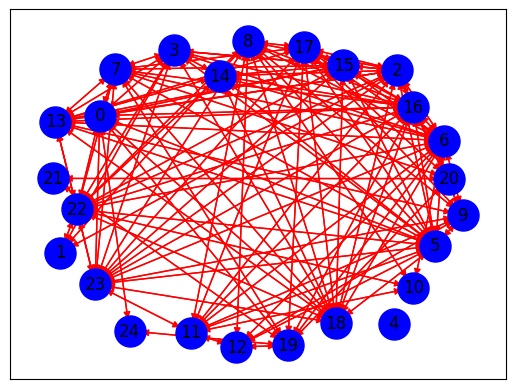

In [15]:
G = nx.DiGraph()
for i in range(len(cossim)):
	G.add_node(i)

for i in range(len(cossim)):
	for j in range(len(cossim)):
		similarity = cossim[i][j]
		if similarity > 0.1 and i != j:
			G.add_edge(i, j)

pos = nx.spring_layout(G, k=4)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Matrix Centralitas


Matriks Sentralitas adalah matriks yang digunakan untuk merepresentasikan ukuran sentralitas dari setiap node dalam jaringan. Sentralitas adalah konsep dalam analisis jaringan yang mencoba mengukur sejauh mana suatu node berada di pusat jaringan atau sejauh mana suatu node penting dalam graph.


### PageRank


Dalam konteks ini, dokumen dianggap sebagai “halaman” yang terhubung oleh hubungan yang merefleksikan keterkaitan atau relevansinya. Dengan menerapkan konsep PageRank, dokumen yang dianggap lebih “penting” atau relevan dapat diberikan skor lebih tinggi. Penggunaan faktor damping, serupa dengan dalam algoritma PageRank, dapat membantu mengontrol sejauh mana pengaruh satu dokumen terhadap yang lain. Dengan memberikan skor pada dokumen berdasarkan hubungan mereka dalam jaringan informasi, kita dapat menghasilkan ringkasan yang mencerminkan tingkat relevansi dan pentingnya masing-masing dokumen dalam konteks keseluruhan.


$$PR_i = \frac{1-d}{n} + d \sum_{P_j\in\{1 \dots,n\}} \frac{PR_i}{L_j}$$


Keterangan:

$PR(i)$ = adalah PageRank dari halaman web ke i.<br>
$d$ = adalah faktor redaman, biasanya diatur sebesar 0,85, yang digunakan untuk menghitung probabilitas bahwa peramban acak akan “melompat” ke halaman acak dan tidak mengikuti sebuah link.<br>
$PR(i)$ = adalah PageRank halaman ke i, yaitu halaman yang memiliki sambungan yang mengarah ke halaman i.<br>
$L(c)$ = adalah jumlah hubungan keluar pada halaman j.


In [16]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
	print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 16: 0.0638
Node 6: 0.0637
Node 5: 0.0592
Node 2: 0.0563
Node 22: 0.0538
Node 23: 0.0524
Node 17: 0.0511
Node 18: 0.0491
Node 8: 0.0482
Node 7: 0.0480
Node 3: 0.0467
Node 15: 0.0459
Node 13: 0.0458
Node 0: 0.0430
Node 19: 0.0417
Node 11: 0.0382
Node 9: 0.0373
Node 14: 0.0333
Node 12: 0.0257
Node 20: 0.0256
Node 10: 0.0187
Node 1: 0.0185
Node 21: 0.0145
Node 24: 0.0135
Node 4: 0.0062


### Hasil Kata Kunci


In [17]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
	top_sentence = kata[node]
	sentence += top_sentence + ", "
	print(f"Node {node}: Page Rank = {pagerank:.4f}")
	print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 16: Page Rank = 0.0638
Kalimat: terbentuk
Node 6: Page Rank = 0.0637
Kalimat: julius
Node 5: Page Rank = 0.0592
Kalimat: dibantu


In [18]:
print('Kata Kunci :', sentence)

Kata Kunci : terbentuk, julius, dibantu, 
